In [1]:
import rasterio
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry import box
import geopandas as gpd


import warnings
warnings.filterwarnings("ignore")

In [2]:
def read_geotiff(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.meta

In [3]:
def calculate_rmse(residual):
    # Remove NaN values
    residual_no_nan = residual[~np.isnan(residual)]
    
    # Calculate squared differences
    squared_diff = np.square(residual_no_nan)
    
    # Compute mean of squared differences
    mean_squared_diff = np.mean(squared_diff)
    
    # Take square root
    rmse = np.sqrt(mean_squared_diff)
    
    return rmse

In [4]:
# Read actual and predicted GeoTIFF files
actual_east_P136_data, actual_east_P136_meta = read_geotiff('P136/masked_merged_target_rgoff.tif')
predicted_east_P136_data, predicted_east_P136_meta = read_geotiff('P136/masked_merged_pred_rgoff.tif')

actual_north_P136_data, actual_north_P136_meta = read_geotiff('P136/masked_merged_target_azoff.tif')
predicted_north_P136_data, predicted_north_P136_meta = read_geotiff('P136/masked_merged_pred_azoff.tif')

# Calculate residual
residual_east_P136 = actual_east_P136_data - predicted_east_P136_data
rmse_east_P136 = calculate_rmse(residual_east_P136)
print('RMSE of east_P136: ', rmse_east_P136)
residual_north_P136 = actual_north_P136_data - predicted_north_P136_data
rmse_north_P136 = calculate_rmse(residual_north_P136)
print('RMSE of north_P136: ', rmse_north_P136)

RMSE of east_P136:  0.17804862194796087
RMSE of north_P136:  0.1875352139170676


In [5]:
actual_east_P158_data, actual_east_P158_meta = read_geotiff('P158/masked_merged_target_rgoff.tif')
predicted_east_P158_data, predicted_east_P158_meta = read_geotiff('P158/masked_merged_pred_rgoff.tif')

actual_north_P158_data, actual_north_P158_meta = read_geotiff('P158/masked_merged_target_azoff.tif')
predicted_north_P158_data, predicted_north_P158_meta = read_geotiff('P158/masked_merged_pred_azoff.tif')

# Calculate residual
residual_east_P158 = actual_east_P158_data - predicted_east_P158_data
rmse_east_P158 = calculate_rmse(residual_east_P158)
print('RMSE of east_P158: ', rmse_east_P158)
residual_north_P158 = actual_north_P158_data - predicted_north_P158_data
rmse_north_P158 = calculate_rmse(residual_north_P158)
print('RMSE of north_P158: ', rmse_north_P158)

RMSE of east_P158:  0.20544290899760825
RMSE of north_P158:  0.2094327794792148


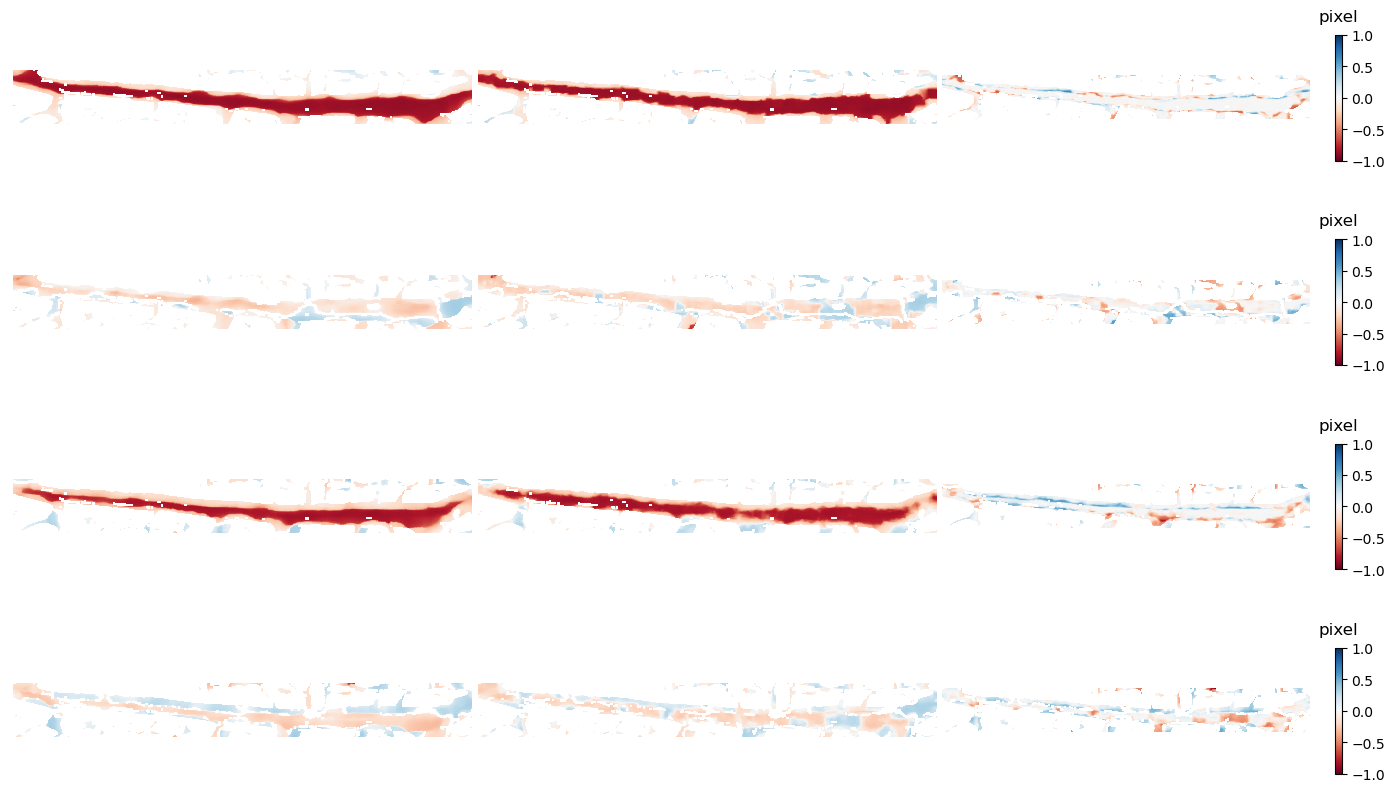

In [6]:
figname = 'TienShan_Glacier.png'
pdfname = 'TienShan_Glacier.pdf'
cmap = 'RdBu'    # 'RdBu', 'viridis', 'jet'

fig, ax = plt.subplots(4, 3, figsize=(18, 10), gridspec_kw={'hspace': 0.3, 'wspace': 0})

ax[0,0].imshow(actual_east_P136_data, cmap=cmap, vmin=-1, vmax=1)
# ax[0,0].set_title('Actual', fontsize=20) 

# Plot predicted data
ax[0,1].imshow(predicted_east_P136_data, cmap=cmap, vmin=-1, vmax=1)
# ax[0,1].set_title('Predicted', fontsize=20) 

# Plot residual
im1 = ax[0,2].imshow(residual_east_P136, cmap=cmap, vmin=-1, vmax=1)
# ax[0,2].set_title('Residual', fontsize=20) 

ax[1,0].imshow(actual_north_P136_data, cmap=cmap, vmin=-1, vmax=1)
# ax[1,0].set_title('Actual', fontsize=20) 

# Plot predicted data
ax[1,1].imshow(predicted_north_P136_data, cmap=cmap, vmin=-1, vmax=1)
# ax[1,1].set_title('Predicted', fontsize=20) 

# Plot residual
im2 = ax[1,2].imshow(residual_north_P136, cmap=cmap, vmin=-1, vmax=1)
# ax[1,2].set_title('Residual', fontsize=20) 

# P158 East plots (new)
ax[2,0].imshow(actual_east_P158_data, cmap=cmap, vmin=-1, vmax=1)
ax[2,1].imshow(predicted_east_P158_data, cmap=cmap, vmin=-1, vmax=1)
im3 = ax[2,2].imshow(residual_east_P158, cmap=cmap, vmin=-1, vmax=1)

# P158 North plots (new)
ax[3,0].imshow(actual_north_P158_data, cmap=cmap, vmin=-1, vmax=1)
ax[3,1].imshow(predicted_north_P158_data, cmap=cmap, vmin=-1, vmax=1)
im4 = ax[3,2].imshow(residual_north_P158, cmap=cmap, vmin=-1, vmax=1)

cbar1 = fig.colorbar(im1, ax=ax[0,2], orientation='vertical', shrink=0.8)
cbar1.ax.set_title('pixel', pad=10)
cbar2 = fig.colorbar(im2, ax=ax[1,2], orientation='vertical', shrink=0.8)
cbar2.ax.set_title('pixel', pad=10)
cbar3 = fig.colorbar(im3, ax=ax[2,2], orientation='vertical', shrink=0.8)
cbar3.ax.set_title('pixel', pad=10)
cbar4 = fig.colorbar(im4, ax=ax[3,2], orientation='vertical', shrink=0.8)
cbar4.ax.set_title('pixel', pad=10)

for row in ax:
    for subplot in row:
        subplot.set_axis_off()

plt.subplots_adjust(hspace=-0.5)  # Adjust this value as needed

plt.tight_layout()
plt.savefig(figname, bbox_inches='tight', dpi=300)
plt.savefig(pdfname, bbox_inches='tight', dpi=300)

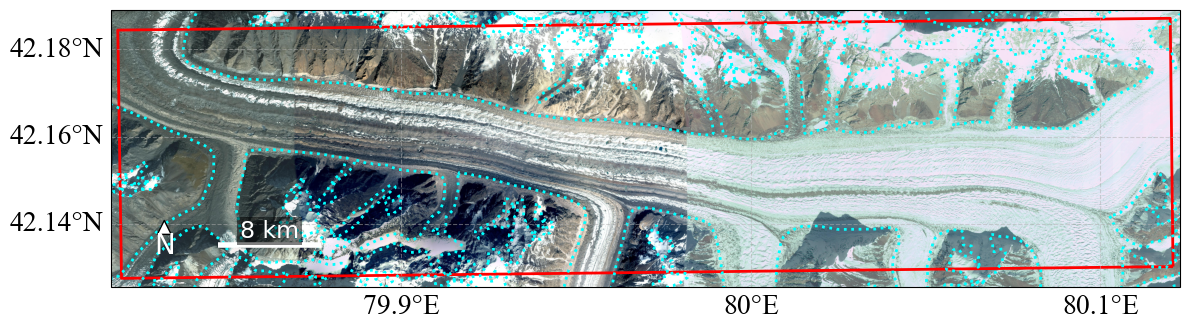

In [7]:
def get_bounding_box(meta):
    transform = meta['transform']
    width = meta['width']
    height = meta['height']
    
    # Get the coordinates of the corners
    left, top = transform * (0, 0)
    right, bottom = transform * (width, height)
    
    return box(left, bottom, right, top)

plot_buffer = 0.002

# Get bounding box
bbox = get_bounding_box(actual_east_P136_meta)

# Create GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': [bbox]}, crs=actual_east_P136_meta['crs'])

# Convert to WGS84
gdf_wgs84 = gdf.to_crs(epsg=4326)

# Create figure and axes with Cartopy projection
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Get the bounds of the bounding box
bounds = gdf_wgs84.total_bounds
lon_min, lat_min, lon_max, lat_max = bounds

# Add buffer to the bounds
lon_min -= plot_buffer
lon_max += plot_buffer
lat_min -= plot_buffer
lat_max += plot_buffer

# Calculate the appropriate zoom level
def calculate_zoom(lon_min, lon_max, lat_min, lat_max, img_size):
    width_ratio = (lon_max - lon_min) / 360
    height_ratio = (lat_max - lat_min) / 180
    max_ratio = max(width_ratio, height_ratio)
    zoom = int(np.ceil(np.log2(1 / max_ratio))) + 1
    return min(zoom, 18)  # Max zoom level is typically 18

zoom = calculate_zoom(lon_min, lon_max, lat_min, lat_max, max(fig.get_size_inches()))

# Add Google Earth-like tiles
google_tiles = GoogleTiles(style='satellite')
# ax.add_image(google_tiles, zoom)
ax.add_image(google_tiles, 16)

# Plot the bounding box
gdf_wgs84.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2, transform=ccrs.PlateCarree())

# Add coastlines and borders for context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Read the shapefile
shapefile_path = 'RGI2000-v7_CentralAsia/RGI2000-v7.0-G-13_central_asia.shp'
shapefile_gdf = gpd.read_file(shapefile_path)

# Ensure the shapefile is in WGS84
shapefile_gdf = shapefile_gdf.to_crs(epsg=4326)

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,0.1))
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,0.02))

# Increase font size of labels
gl.xlabel_style = {'size': 20, 'fontname': 'Times New Roman'}       # 'weight': 'bold'
gl.ylabel_style = {'size': 20, 'fontname': 'Times New Roman'}

# Plot the shapefile polygon
shapefile_gdf.plot(ax=ax, facecolor='none', edgecolor='cyan', linewidth=2, linestyle=':', transform=ccrs.PlateCarree())

# Add north arrow
x, y, arrow_length = 0.05, 0.25, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(arrowstyle='simple',facecolor='white'),
            ha='center', va='center', fontsize=20, color='white',
            xycoords=ax.transAxes)

# Get current axis limits
x_lims = ax.get_xlim()
y_lims = ax.get_ylim()

# Add custom scale bar
scale_bar_length = 8  # km
scale_bar_x = 0.1
scale_bar_y = 0.15

# Calculate scale bar length in degrees (approximate)
cen_lat = (bounds[1] + bounds[3]) /2
scale_bar_length_deg = scale_bar_length / (111.32 * np.cos(cen_lat*np.pi/180))  # 1 degree is approximately 111.32 km

# Draw scale bar
ax.plot([scale_bar_x, scale_bar_x + scale_bar_length_deg], [scale_bar_y, scale_bar_y], 
        transform=ax.transAxes, color='white', linewidth=4, solid_capstyle='butt')

# Add scale bar label
ax.text(scale_bar_x + scale_bar_length_deg/2, scale_bar_y + 0.01, f'{scale_bar_length} km', 
        transform=ax.transAxes, ha='center', va='bottom', color='white', fontsize=17, 
        bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=2))

# Reset axis limits (they might have changed when adding the scale bar)
ax.set_xlim(x_lims)
ax.set_ylim(y_lims)

# Set the extent of the map
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

plt.tight_layout()
plt.savefig('TienShan_GE.png', bbox_inches='tight', dpi=300)
plt.savefig('TienShan_GE.pdf', bbox_inches='tight', dpi=300)